In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium
import json
import geojson

## This script contains the following:
### Import data and libraries
### Data wrangling
### Data cleaning
### Plotting a choropleth


In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
#Import .geojson file
nyc_geo= r"C:\Users\charan.lalwani\Downloads\Shapefiles and base map.geojson"

In [4]:
# Checking the geojson file contents:

f = open(r"C:\Users\charan.lalwani\Downloads\Shapefiles and base map.geojson",)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
df = pd.read_csv(r"C:\Users\charan.lalwani\Documents\cf\Achievement 6\New york citi bikes\Data\Prepared Data\df.csv", index_col = False)

In [6]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,age_group
0,LnQzQk,16013,NaN,18,2013-09-09 18:18:00,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:00,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,56.0,56-65
1,IL9boN,15230,NaN,18,2013-09-12 18:38:00,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:00,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,41.0,36-45
2,46clGB,17942,NaN,19,2013-09-18 19:44:00,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:00,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,35.0,36-45
3,v7vdFt,19683,NaN,11,2013-09-28 11:54:00,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:00,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,36.0,36-45
4,VGBsb5,18024,NaN,18,2013-09-07 18:08:00,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:00,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1985.0,Not Available,39.0,36-45


In [7]:
df.shape

(50000, 20)

In [8]:
#how many rides occured at one station
station_counts = df.groupby('start_station_id')['start_time'].count().reset_index()

In [9]:
#how many rides occured at one station
station_counts

,start_station_id,start_time
0,72,161
1,79,139
2,82,71
3,83,83
4,116,301
...,...,...
325,2017,110
326,2021,181
327,2022,99
328,2023,81


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  50000 non-null  object 
 1   bike_id                  50000 non-null  int64  
 2   weekday                  0 non-null      float64
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  float64
 8   start_station_longitude  50000 non-null  float64
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  float64
 13  end_station_longitude    50000 non-null  float64
 14  trip_duration         

#### #how many rides occured at each station each day

In [18]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['weekday'] = df['start_time'].dt.day_name()
station_counts_day = df.groupby(['start_station_id', 'weekday'])['start_time'].count()
print(station_counts_day)

start_station_id  weekday  
72                Friday       32
                  Monday       23
                  Saturday     24
                  Sunday       26
                  Thursday     21
                               ..
3002              Saturday     52
                  Sunday       52
                  Thursday     24
                  Tuesday      29
                  Wednesday    40
Name: start_time, Length: 2288, dtype: int64


### Data wrangling

In [20]:
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'age',
       'age_group'],
      dtype='object')

In [22]:
# select only needed columns
columns = ["weekday","start_hour","start_station_id","start_station_longitude","start_station_latitude"]

In [25]:
# Check for missing values

df.isnull().sum()

trip_id                     0
bike_id                     0
weekday                     0
start_hour                  0
start_time                  0
start_station_id            0
start_station_name          0
start_station_latitude      0
start_station_longitude     0
end_time                    0
end_station_id              0
end_station_name            0
end_station_latitude        0
end_station_longitude       0
trip_duration               0
subscriber                  0
birth_year                  0
gender                      0
age                         0
age_group                  29
dtype: int64

In [31]:
# Check for  duplicates
df_dups = df[df.duplicated()]

### Extreme value check

<Axes: xlabel='birth_year', ylabel='Count'>

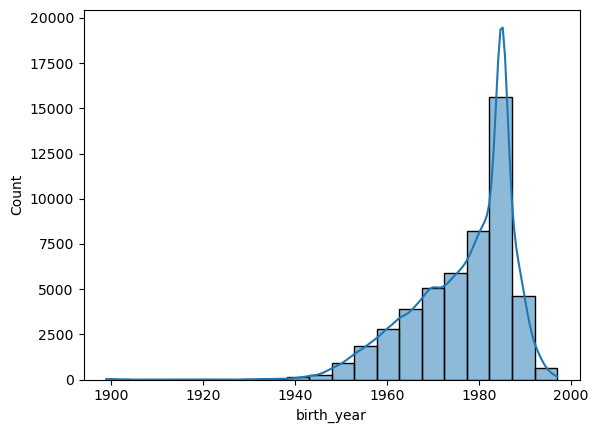

In [32]:
sns.histplot(df['birth_year'], bins=20, kde = True) # shows extreme values for 'birth_year'

In [33]:
# Check how many extreme values

df[df['birth_year'] <1928]

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,age_group
306,dSYFPK,15004,Friday,22,2013-09-06 22:27:00,473,Rivington St & Chrystie St,40.721101,-73.991925,2013-09-06 22:29:00,473,Rivington St & Chrystie St,40.721101,-73.991925,102,Subscriber,1922.0,1,102.0,NaN
563,wkmOxr,19507,Monday,12,2013-09-23 12:43:00,305,E 58 St & 3 Ave,40.760958,-73.967245,2013-09-23 12:52:00,2006,Central Park S & 6 Ave,40.765909,-73.976342,532,Subscriber,1900.0,1,124.0,NaN
1371,M2EaCC,16277,Thursday,11,2013-09-05 11:20:00,500,Broadway & W 51 St,40.762288,-73.983362,2013-09-05 11:36:00,497,E 17 St & Broadway,40.737050,-73.990093,915,Subscriber,1900.0,1,124.0,NaN
1431,j2Vg6q,14638,Thursday,7,2013-09-26 07:35:00,427,State St,40.702515,-74.014270,2013-09-26 08:00:00,212,W 16 St & The High Line,40.743349,-74.006818,1484,Subscriber,1901.0,1,123.0,NaN
1754,BQLrTb,17594,Wednesday,17,2013-09-25 17:00:00,476,E 31 St & 3 Ave,40.743943,-73.979661,2013-09-25 17:09:00,435,W 21 St & 6 Ave,40.741740,-73.994156,569,Subscriber,1900.0,1,124.0,NaN
3548,ij2ZaZ,14835,Thursday,17,2013-09-19 17:52:00,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-19 18:03:00,168,W 18 St & 6 Ave,40.739713,-73.994564,627,Subscriber,1922.0,1,102.0,NaN
4823,S6IfuK,19804,Thursday,7,2013-09-12 07:36:00,515,W 43 St & 10 Ave,40.760094,-73.994618,2013-09-12 07:55:00,268,Howard St & Centre St,40.719105,-73.999733,1103,Subscriber,1899.0,1,125.0,NaN
7502,qawZh0,17490,Monday,7,2013-09-30 07:38:00,498,Broadway & W 32 St,40.748549,-73.988084,2013-09-30 08:01:00,340,Madison St & Clinton St,40.712690,-73.987763,1351,Subscriber,1900.0,1,124.0,NaN
9644,wBkIk3,15732,Sunday,11,2013-09-08 11:11:00,515,W 43 St & 10 Ave,40.760094,-73.994618,2013-09-08 11:32:00,268,Howard St & Centre St,40.719105,-73.999733,1227,Subscriber,1899.0,1,125.0,NaN
12926,xokid3,14944,Friday,20,2013-09-20 20:16:00,427,State St,40.702515,-74.014270,2013-09-20 20:58:00,259,South St & Whitehall St,40.701221,-74.012342,2547,Subscriber,1899.0,1,125.0,NaN


In [34]:
# Clean extreme values

df = df[df['birth_year'] >1928 ] 
# 1928 was picked because the possibility of someone aged more than 85 to ride a citi bike is very slim.

In [35]:
df.shape

(49970, 20)

In [36]:
# Check how many extreme values

df[df['birth_year'] <1928]

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,age_group


### Average rides per day by start station

In [24]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['weekday'] = df['start_time'].dt.day_name()
station_counts_day = df.groupby(['start_station_id', 'weekday'])['start_time'].count()
print(station_counts_day)

start_station_id  weekday  
72                Friday       32
                  Monday       23
                  Saturday     24
                  Sunday       26
                  Thursday     21
                               ..
3002              Saturday     52
                  Sunday       52
                  Thursday     24
                  Tuesday      29
                  Wednesday    40
Name: start_time, Length: 2288, dtype: int64


In [27]:
station_avg_rides_per_day = station_counts_day.groupby('start_station_id').mean().reset_index()

In [28]:
station_avg_rides_per_day 

,start_station_id,start_time
0,72,23.000000
1,79,19.857143
2,82,10.142857
3,83,11.857143
4,116,43.000000
...,...,...
325,2017,15.714286
326,2021,25.857143
327,2022,14.142857
328,2023,11.571429


In [29]:
#changing column name
station_avg_rides_per_day= station_avg_rides_per_day.rename(columns={'start_time':'average_daily_rides'})

### Plotting a choropleth

In [41]:
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,age,age_group
0,LnQzQk,16013,Monday,18,2013-09-09 18:18:00,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:00,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,56.0,56-65
1,IL9boN,15230,Thursday,18,2013-09-12 18:38:00,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:00,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,41.0,36-45
2,46clGB,17942,Wednesday,19,2013-09-18 19:44:00,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:00,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,35.0,36-45
3,v7vdFt,19683,Saturday,11,2013-09-28 11:54:00,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:00,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,36.0,36-45
4,VGBsb5,18024,Saturday,18,2013-09-07 18:08:00,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:00,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1985.0,Not Available,39.0,36-45


In [43]:
# lat and long for each station
station_loc = df.groupby('start_station_id')[['start_station_latitude', 'start_station_longitude']].mean()

In [44]:
# each station with lat and longitude and avg daily rides
df_merged = station_loc.merge(station_avg_rides_per_day, on = 'start_station_id')

In [45]:
df_merged

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,72,40.767272,-73.993929,23.000000
1,79,40.719116,-74.006667,19.857143
2,82,40.711174,-74.000165,10.142857
3,83,40.683826,-73.976323,11.857143
4,116,40.741776,-74.001497,43.000000
...,...,...,...,...
325,2017,40.750224,-73.971214,15.714286
326,2021,40.759291,-73.988597,25.857143
327,2022,40.758491,-73.959206,14.142857
328,2023,40.759681,-73.970314,11.571429


In [46]:
data_to_plot = df_merged[['start_station_id','average_daily_rides',]]
data_to_plot.head()

,start_station_id,average_daily_rides
0,72,23.000000
1,79,19.857143
2,82,10.142857
3,83,11.857143
4,116,43.000000


In [47]:
data_to_plot_1 = df_merged[['start_station_longitude','start_station_latitude','average_daily_rides',]]
data_to_plot_1.head()

,start_station_longitude,start_station_latitude,average_daily_rides
0,-73.993929,40.767272,23.000000
1,-74.006667,40.719116,19.857143
2,-74.000165,40.711174,10.142857
3,-73.976323,40.683826,11.857143
4,-74.001497,40.741776,43.000000


In [49]:
with open(nyc_geo) as f:
    data = json.load(f)

# Print the first feature to see its structure
print(data['features'][0])

{'type': 'Feature', 'properties': {'name': None, 'shape_area': '1768.56720466', 'built_code': None, 'heightroof': '26.52854879', 'bbl': '4155980564', 'cnstrct_yr': '2001', 'num_floors': '2', 'lststatype': 'Constructed', 'feat_code': '2100', 'groundelev': '6', 'sub_code': '210000', 'bin': '4462384', 'lstmoddate': '2005-05-31T00:00:00.000Z', 'doitt_id': '939203', 'shape_len': '169.940373452'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-73.74251376378085, 40.59908599695821], [-73.74258974686987, 40.59907793366453], [-73.74259035198187, 40.599081248055946], [-73.74265191212389, 40.599074715728335], [-73.74267435022897, 40.59919755902816], [-73.74253680674262, 40.59921215557708], [-73.74251376378085, 40.59908599695821]]]]}}


In [50]:
# Print more information from the GeoJSON file
print(data['features'][0]['properties'])

{'name': None, 'shape_area': '1768.56720466', 'built_code': None, 'heightroof': '26.52854879', 'bbl': '4155980564', 'cnstrct_yr': '2001', 'num_floors': '2', 'lststatype': 'Constructed', 'feat_code': '2100', 'groundelev': '6', 'sub_code': '210000', 'bin': '4462384', 'lstmoddate': '2005-05-31T00:00:00.000Z', 'doitt_id': '939203', 'shape_len': '169.940373452'}


In [51]:
# Print keys under 'properties'
print(data['features'][0]['properties'].keys())

dict_keys(['name', 'shape_area', 'built_code', 'heightroof', 'bbl', 'cnstrct_yr', 'num_floors', 'lststatype', 'feat_code', 'groundelev', 'sub_code', 'bin', 'lstmoddate', 'doitt_id', 'shape_len'])


In [53]:
# Setup a folium map at a high-level zoom
map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Choropleth map
folium.Choropleth(
    geo_data=nyc_geo,
    data=data_to_plot_1,
    columns=['start_station_longitude', 'start_station_latitude', 'average_daily_rides'],
    key_on='feature.properties.bin',  # Use 'bin' as the key
    fill_color='YlOrBr',
    fill_opacity=0.6,
    line_opacity=0.1,
    legend_name="Average Daily Rides"
).add_to(map)

folium.LayerControl().add_to(map)

# Display the map
map

In [54]:
map

In [56]:
df.to_csv(os.path.join(r"C:\Users\charan.lalwani\Documents\cf\Achievement 6\New york citi bikes\Data\Prepared Data" ,"df_new.csv"), index=False)